In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
plt.clf()
dataset.groupby(['order_month','province'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by province',loc = 'center',pad = 30, fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel ('Total Amount (Billions)',fontsize = 15)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 0.5)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
datadki = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10') ]
datadki.head()


# MEMBUAT PIE CARD

In [ ]:
gmv_data_dki = datadki.groupby('city')['gmv'].sum().reset_index()

plt.figure(figsize = (6,6))
plt.pie(gmv_data_dki['gmv'],labels=gmv_data_dki['city'],autopct='%1.2f%%')
# auto pct disini fungsinya untuk menampilkan nilai dari pie
plt.title('GMV Contribution per City in 2019-10',loc='center',pad=30,fontsize=20,color='red')
plt.show()


In [ ]:

datadki

# Membuat Bar

In [ ]:
plt.clf()
#membuat menjadi value biasa
# datadki.groupby(['city'])['gmv'].sum().sort_values(ascending=False).plot(kind='bar',color='green') 

#Membuat stacked card
datadki.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='kde')
plt.title('GMV Per City - DKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(bbox_to_anchor=(1,1),shadow=True,title='Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
datadki.groupby(['order_month','city'],)['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar',stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDki Jakarta Q4 2019',loc='center',pad=30,fontsize=20,color='blue')
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Total Mount (in Billions)', fontsize=12)
plt.legend(bbox_to_anchor=(1,1),shadow=True,ncol=1,title='City')
plt.ylim(ymin=0)
labels, locations= plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Membuat Agregat Data Customer


<Figure size 432x288 with 0 Axes>

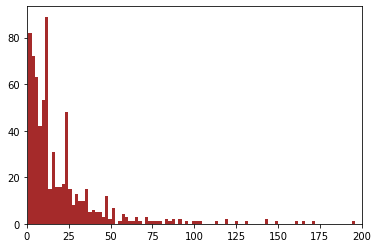

In [34]:
datapercustomer = datadki.groupby('customer_id').agg({'order_id':'nunique','gmv':'sum','quantity':'sum'}).rename(columns={'order_id' : 'orders'})
datapercustomer.sort_values(by = 'orders',ascending=True)
plt.clf()
plt.figure()
# plt.hist(datapercustomer['orders'],range=(1,5),color='orange')

plt.hist(datapercustomer['quantity'],range=(1,200),bins=100,color='brown')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)

plt.xlim(xmin=0, xmax=200)
plt.show()